# Исследование продаж игр интернет-магазина "Стримчик"

Из открытых источников доступны исторические данные о продаже игр, оценки пользователей и экспертов, жанры и платформы. Перед нами данные до 2016 года. 

**Цель исследования:** выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования:**
1. Загрузка данных и изучение общей информации.
2. Подготовка данных.
3. Исследовательский анализ данных.
4. Составление портрета пользователя каждого региона.
5. Проверка гипотез.
6. Выводы.

**Описание данных:**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг - компьютерных игр и присваивает им подходящую возрастную категорию.

## Загрузка данных и изучение общей информации

Загрузим необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats as st

Загрузим данные и посмотрим на их структуру

In [2]:
data = pd.read_csv('games.csv')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Просмотрим информацию о каждом столбце данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных

Приведем названия столбцов к нижнему регистру

In [5]:
data.columns = map(str.lower, data.columns)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Обработаем пропуски. Сначала определим, какой объем пропусков присутствует в каждом столбце

In [6]:
display(pd.DataFrame(data.isna().mean()*100).style.background_gradient('coolwarm'))

,0
name,0.011965
platform,0.000000
year_of_release,1.609333
genre,0.011965
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.319174
user_score,40.089740


Пропусков в столбце с годом релиза игры всего 2%. Удалим эти 2 процента данных. Если говорить о столбцах с оценками пользователей и критиков, то здесь больше 40% пропусков. Причем эти пропуски, чаще всего, встречаютсяв одной строке, т.е. если нет данных об оценке критиков, то скорее всего и не будет данных об оценке пользователей. Данные пропуски могут быть вызваны недоступностью информации об оценках данной игры или, что менее вероятно, оценивание игры просто не проводилось. Подобные данные оставим, как есть. Пропуски в столбце с рейтингом игры заполним значением "unknown" Также есть пропуски в столбце с названием и жанором игры. Эти пропуски также удалим из набора данных. В столбце user_score присутствует аббревиатура 'tbd'. Она может означать, что оценка пользователя не определена. Заменим эти значения на NaN

In [7]:
data = data.dropna(subset=['year_of_release'])
data = data.dropna(subset=['name'])
data = data.dropna(subset=['genre'])
data['rating'] = data['rating'].fillna('unknown')
data['user_score'] = data['user_score'].replace('tbd', np.nan)

Приведем столбец с годом выпуска игры к значению int, т.к. это значение должно быть целым.

In [8]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')

Проверим количество дубликатов в наборе данных

In [9]:
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 0


Посчитаем суммарные продажи по каждой игре во всех регионах и запишем их в отдельный столбец total_sales

In [10]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


Взглянем на столбец rating, а именно на категории, которые в этом столбце присутствуют.

In [11]:
data['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

Категории EC, K-A, AO и RP являются немногочисленными, по сравнению с другими, и не информативными. Данные с этими категориями можно удалить.

In [12]:
data = data.query('(rating == "unknown") or (rating == "E") or (rating == "T") or (rating == "M") or (rating == "E10+")')
data['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
Name: rating, dtype: int64

**Итог.**
В ходе подготовки данных было проделано следующее:

1. обработали пропуски в данных;
2. привели признаки к необходимым типам;
3. проверили данные на дубликаты;
4. добавили новый признак суммарных продаж;
5. исключили из набора данных неинформативные записи.

## Исследовательский анализ данных

Посмотрим на количество игр, выпускаемых в разные года

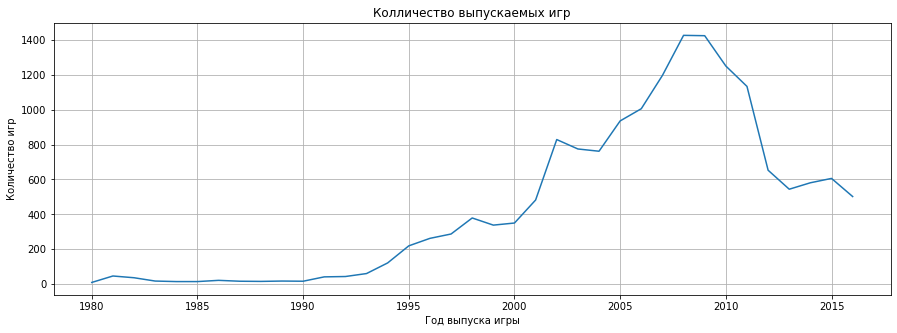

In [13]:
data['year_of_release'].value_counts().sort_index().plot(grid=True, figsize=(15,5), title='Колличество выпускаемых игр')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество игр')
plt.show()

Число выпускаемых игр начинает расти с 1995 года, как раз с того времени, когда набирает популярность игровая индустрия. Период с 1995 года будет первым актуальным периодом в исследовании (данные до 1995 года в нашем исследовании больше не будем использовать).

Посмотрим, как менялись продажи по платформам, начиная с 1995 года. Для этого определим платформы с наибольшими суммарными продажами (возьмем 10 самых популярных).

In [14]:
top10_platform = data.query('year_of_release > 1995').pivot_table(index='platform', values=['total_sales'], 
                                  aggfunc=('sum')).sort_values(by='total_sales', ascending=False).head(10)
top10_platform

,total_sales
platform,
PS2,1233.32
X360,961.24
PS3,931.34
Wii,890.52
DS,802.11
PS,683.68
PS4,314.14
GBA,312.88
PSP,289.53


Для этих 10-ти платформ построим распределение продаж по годам

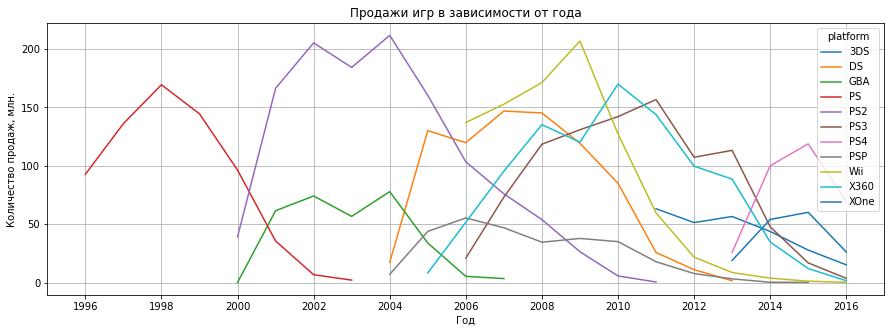

In [15]:
quer='(platform == "PS2") or (platform == "X360") or (platform == "PS3") or (platform == "Wii") or (platform == "DS") \
or (platform == "PS") or (platform == "PS4") or (platform == "GBA") or (platform == "PSP") or (platform == "3DS") or (platform == "XOne")'
data.query('year_of_release > 1995').query(quer).pivot_table(index='year_of_release', values='total_sales', 
                                                             columns='platform', aggfunc='sum').plot(figsize=(15,5), grid=True,
                                                                                                    title='Продажи игр в зависимости от года')

plt.xlabel('Год')
plt.ylabel('Количество продаж, млн.')
plt.locator_params(axis='x', nbins=15)
plt.show()

Платформа PS4 лидирует по продажам с большим отрывом от своих конкурентов, однако прослеживается тендеция спада за последний год. Все же PS4 можно назвать потенциально прибыльной платформой и на ближайшее будущее. 

После появления PS4 продажи игр на платформе PS3 резко упали. Данную платформу нельзя считать потенциально прибыльной, как и X360. 

Платформа XOne такая же "молодая", как и PS4. Несмотря на то, что объемы продаж ниже, чем у PS4, XOne можно назвать потенциально прибыльной платформой.

Еще одной потенциально прибыльной платформой можно назвать 3DS. За последние 5 лет у этой платформы объемы продаж находятся на относительно высоком уровне, хотя и наблюдается незначительный спад.

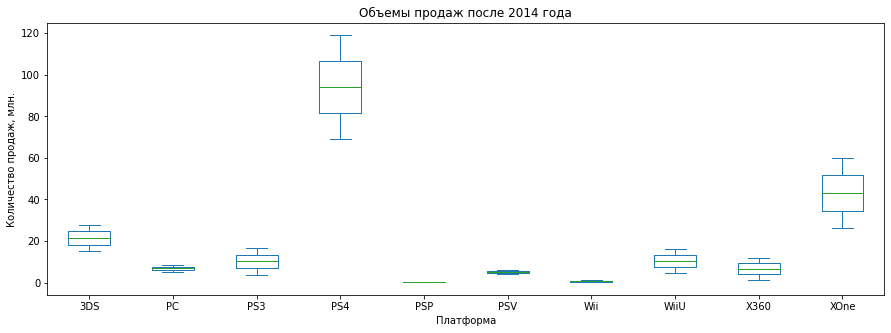

In [16]:
data.query('year_of_release > 2014').pivot_table(index='year_of_release', values='total_sales', 
                                                             columns='platform', aggfunc='sum').plot(kind='box', figsize=(15,5),
                                                                                                    title='Объемы продаж после 2014 года')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж, млн.')
plt.show()

За последние 2 года по объемам продаж самыми популярными платформами являются PS4, XOne и 3DS. В дальнейшем будем исследовать только эти платформы. Для подробного анализа этиъ платформ возьмем период с 2014 по 2016 года включительно.

Сделаем срез общих данных, где информация будет только о трех платформах (PS4, XOne и 3DS) и за период с 2014 по 2016 года включительно.

In [17]:
top3 = data.query('(year_of_release >= 2014) and \
                  ((platform == "PS4") or (platform == "XOne") or (platform == "3DS"))').reset_index(drop=True)
top3.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98


Возьмем такую популярную платформу, как PS4 и посмотрим, как на продажи влияют отзывы пользователей и критиков 

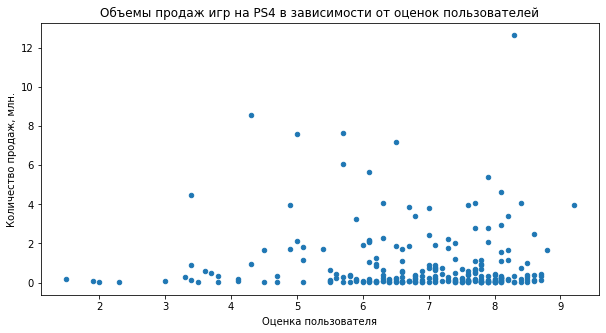

Коэффициент корреляции Пирсона: -0.040131589472697356


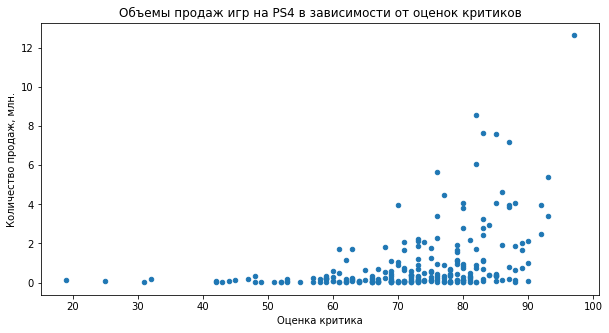

Коэффициент корреляции Пирсона: 0.40266141068104083


In [18]:
Plat_PS4 = top3.query('platform == "PS4"')
Plat_PS4.plot(kind='scatter', x='user_score', y='total_sales', 
              title='Объемы продаж игр на PS4 в зависимости от оценок пользователей', figsize=(10,5))
plt.xlabel('Оценка пользователя')
plt.ylabel('Количество продаж, млн.')
plt.show()
print('Коэффициент корреляции Пирсона:', Plat_PS4['user_score'].corr(Plat_PS4['total_sales']))

Plat_PS4.plot(kind='scatter', x='critic_score', y='total_sales', 
              title='Объемы продаж игр на PS4 в зависимости от оценок критиков', figsize=(10,5))
plt.xlabel('Оценка критика')
plt.ylabel('Количество продаж, млн.')
plt.show()
print('Коэффициент корреляции Пирсона:', Plat_PS4['critic_score'].corr(Plat_PS4['total_sales']))

Внутри такой платформы, как PS4 оценки пользователей никак не влияют на объемы продаж. Если говорить про критиков, то заметна небольшая прямая зависимость между объемами продаж и оценкой критика.

Посмотрим, можно ли такие выводы сделать про другие платформы. Возьмем платформу XOne. Проведем аналогичное исследование. 

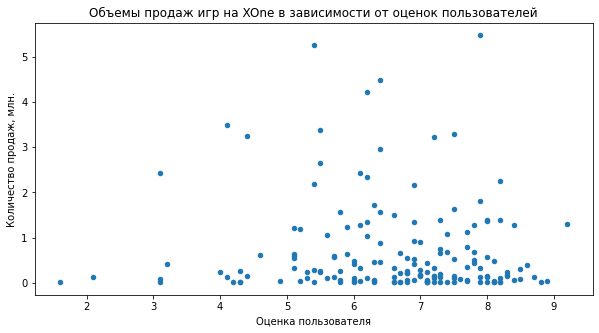

Коэффициент корреляции Пирсона: -0.0703839280647581


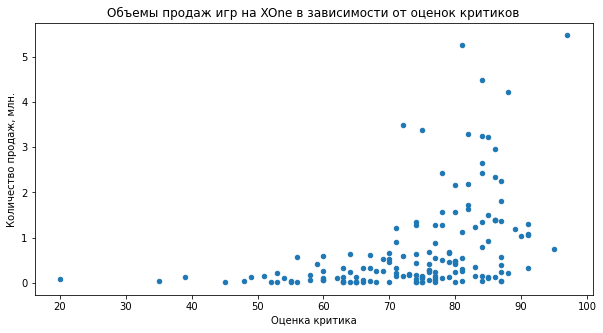

Коэффициент корреляции Пирсона: 0.42867694370333226


In [19]:
XOne = top3.query('platform == "XOne"')
XOne.plot(kind='scatter', x='user_score', y='total_sales', 
          title='Объемы продаж игр на XOne в зависимости от оценок пользователей', figsize=(10,5))
plt.xlabel('Оценка пользователя')
plt.ylabel('Количество продаж, млн.')
plt.show()
print('Коэффициент корреляции Пирсона:', XOne['user_score'].corr(XOne['total_sales']))

XOne.plot(kind='scatter', x='critic_score', y='total_sales', 
          title='Объемы продаж игр на XOne в зависимости от оценок критиков', figsize=(10,5))
plt.xlabel('Оценка критика')
plt.ylabel('Количество продаж, млн.')
plt.show()
print('Коэффициент корреляции Пирсона:', XOne['critic_score'].corr(XOne['total_sales']))

Получили схожие результаты, а именное, оценки пользвоателей почти не влияют на объемы продаж, а вот оценке критиков при покупке доверют больше.

Теперь посмотрим на общее распределение игр по жанрам

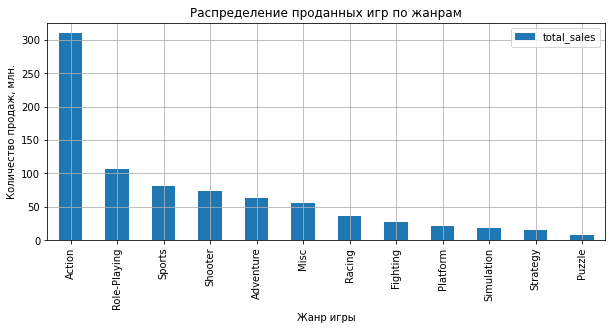

In [20]:
genre = top3.pivot_table(index='genre', values='total_sales', aggfunc='count')
genre.sort_values(by='total_sales', ascending=False).plot(kind='bar', grid=True, 
                                                          title='Распределение проданных игр по жанрам', figsize=(10,4))
plt.xlabel('Жанр игры')
plt.ylabel('Количество продаж, млн.')
plt.show()

Как видим, большинство игр за последние 3 года было выпущено в жанре Action. На значительно более низком уровне по количеству выпущенных игр находятся жанры Adventure, Misc, Role-Playing, Shooter и Sports. Посмотрим как обстоят дела с объемами продаж. Рассчитаем медианное значение продаж для каждого жанра.

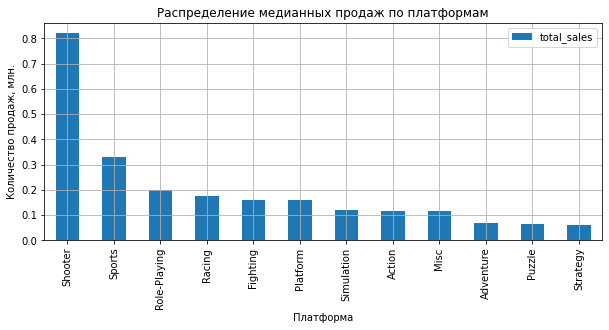

In [21]:
genre_total = top3.pivot_table(index='genre', values='total_sales', aggfunc='median')
genre_total.sort_values(by='total_sales', ascending=False).plot(kind='bar', 
                                                                grid=True, title='Распределение медианных продаж по платформам', 
                                                                figsize=(10,4))
plt.xlabel('Платформа')
plt.ylabel('Количество продаж, млн.')
plt.show()

Медианное значение продаж самое большое у жанра Shooter (чуть больше 0.8 млн). Далее идет жанр Sports (чуть больше 0.3 млн) и Role-Playing (0.2 млн). Можно предположить, что в тройку самых прибыльных жанров за последние 3 года входят Role-Playing, Shooter и Sports

**Итог.**
В ходе исследовательского анализа данных было проделано следующее:

1. проследили тенденцию объема продаж по годам на различных платформах;
2. выделили 3 самые популярные платформы по продажам;
3. проанализировали самые популярные жанры продаваемых игр.

## Составление портрета пользователя каждого региона

Посмотрим на самые популярные плтформы в каждом регионе.

Продажи в регионе NA


,na_sales,total_sales,share
platform,,,
X360,226.80,380.38,0.596246
PS3,168.26,445.57,0.377629
PS4,108.74,314.14,0.346151
XOne,93.12,159.32,0.584484
3DS,82.65,257.81,0.320585


Продажи в регионе EU


,eu_sales,total_sales,share
platform,,,
PS3,163.10,445.57,0.366048
PS4,141.09,314.14,0.449131
X360,117.10,380.38,0.307850
3DS,61.27,257.81,0.237656
PC,56.67,97.64,0.580397


Продажи в регионе JP


,jp_sales,total_sales,share
platform,,,
3DS,100.62,257.81,0.390287
PS3,49.39,445.57,0.110847
PSP,24.04,29.01,0.828680
PSV,21.84,53.81,0.405873
PS4,15.96,314.14,0.050805


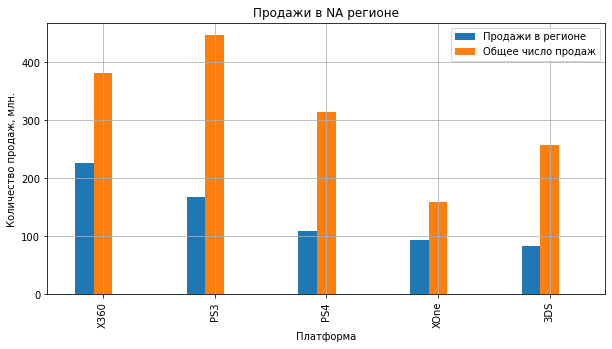

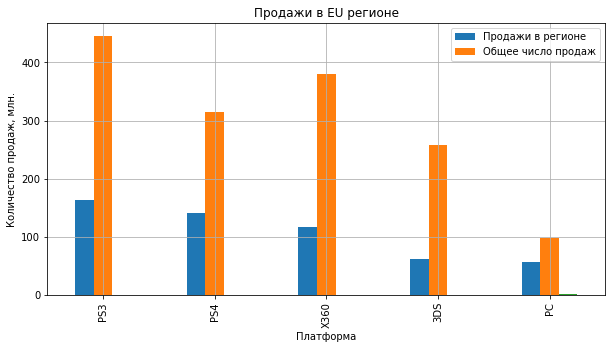

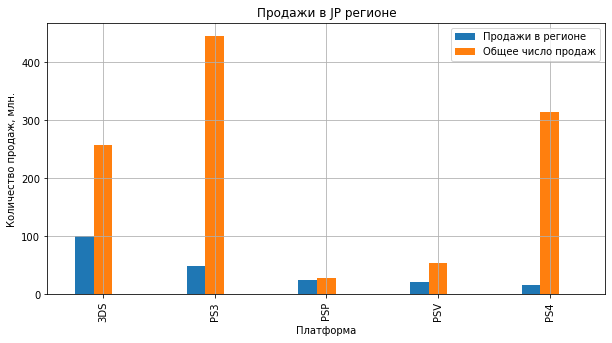

In [22]:
NA = data.query('year_of_release > 2010').pivot_table(index='platform', values=['na_sales', 'total_sales'], 
                                                      aggfunc='sum').sort_values(by='na_sales', ascending=False)
EU = data.query('year_of_release > 2010').pivot_table(index='platform', values=['eu_sales', 'total_sales'],
                                                      aggfunc='sum').sort_values(by='eu_sales', ascending=False)
JP = data.query('year_of_release > 2010').pivot_table(index='platform', values=['jp_sales', 'total_sales'],
                                                      aggfunc='sum').sort_values(by='jp_sales', ascending=False)
NA['share'] = NA['na_sales'] / NA['total_sales']
EU['share'] = EU['eu_sales'] / EU['total_sales']
JP['share'] = JP['jp_sales'] / JP['total_sales']
print('Продажи в регионе NA')
display(NA.head())
print('Продажи в регионе EU')
display(EU.head())
print('Продажи в регионе JP')
display(JP.head())

NA.head().plot(kind='bar', figsize=(10,5), grid=True, title='Продажи в NA регионе')
plt.legend(['Продажи в регионе', 'Общее число продаж'])
plt.xlabel('Платформа')
plt.ylabel('Количество продаж, млн.')
plt.show()

EU.head().plot(kind='bar', figsize=(10,5), grid=True, title='Продажи в EU регионе')
plt.legend(['Продажи в регионе', 'Общее число продаж'])
plt.xlabel('Платформа')
plt.ylabel('Количество продаж, млн.')
plt.show()

JP.head().plot(kind='bar', figsize=(10,5), grid=True, title='Продажи в JP регионе')
plt.legend(['Продажи в регионе', 'Общее число продаж'])
plt.xlabel('Платформа')
plt.ylabel('Количество продаж, млн.')
plt.show()

В регионе NA самыми популярными платформами являются X360, PS3, PS4, XOne, 3DS. Стоит отметить, что продажи игр на платформах X360 и XOne в данном регионе составляют почти 60 процентов от общего числа продаж на этих платформах. В списке топ 5 платформ по пулярности в EU регионе появляется PC так же с 60-тью процентами от всех продаж на этой платформе. В регионе JP список самых популярных платформ выглядит следующим образом: 3DS, PS3, PSP, PSV, PS4. Можно заметить, что продажи на платформе PSP в данном регионе составлют более 80-ти процентов от общего числа продаж на этой платформе, т.е. в остальных регионах эта платформа не пользуется спросом.

Посмотрим, какие жанры пользуются спросом в каждом из регионов.

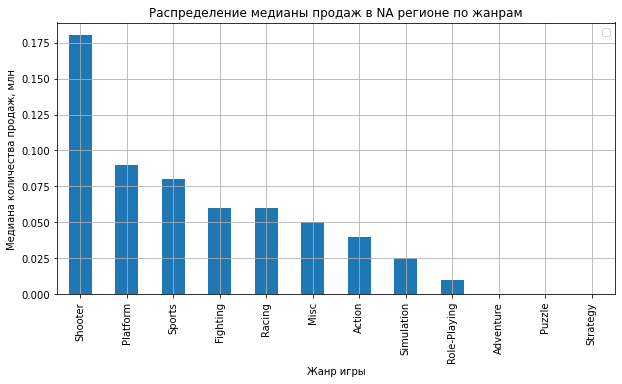

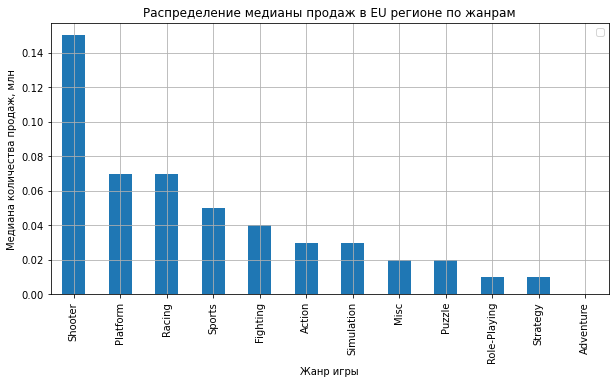

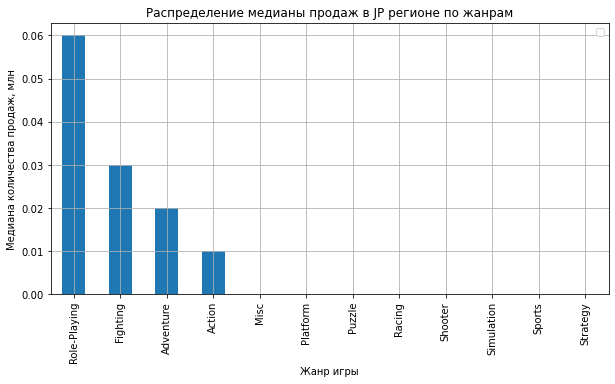

In [23]:
NA_genre = data.query('year_of_release > 2010').pivot_table(index='genre', values='na_sales', 
                                                      aggfunc='median').sort_values(by='na_sales', ascending=False)
EU_genre = data.query('year_of_release > 2010').pivot_table(index='genre', values='eu_sales',
                                                      aggfunc='median').sort_values(by='eu_sales', ascending=False)
JP_genre = data.query('year_of_release > 2010').pivot_table(index='genre', values='jp_sales',
                                                      aggfunc='median').sort_values(by='jp_sales', ascending=False)

NA_genre.plot(kind='bar', figsize=(10,5), grid=True, title='Распределение медианы продаж в NA регионе по жанрам')
plt.legend([])
plt.xlabel('Жанр игры')
plt.ylabel('Медиана количества продаж, млн')
plt.show()

EU_genre.plot(kind='bar', figsize=(10,5), grid=True, title='Распределение медианы продаж в EU регионе по жанрам')
plt.legend([])
plt.xlabel('Жанр игры')
plt.ylabel('Медиана количества продаж, млн')
plt.show()

JP_genre.plot(kind='bar', figsize=(10,5), grid=True, title='Распределение медианы продаж в JP регионе по жанрам')
plt.legend([])
plt.xlabel('Жанр игры')
plt.ylabel('Медиана количества продаж, млн')
plt.show()

В регионе NA самыми популярными жанрами являются Shooter, Platform, Sports, Fighting и Racing. В EU регионе топ 5 популярных жанров почти схож с тем, который есть в NA регионе, только жанр Racing здесь популярнее Sports и Fighting. В регионе JP подобный топ 5 выглядит немного по-другому. Здесь популряными жанрами являются Pole-Playing, Fighting, Adventure, Action. Подобные различия могут быть вызваны тем, что в конкретном регионе, например, разрабатывается игр в определенном жанре больше, чем в другом. Главное же причиной является интерес целевой аудитории.

Понаблюдаем, влияет ли рейтинг ESRB на продажи в отдельных регионах

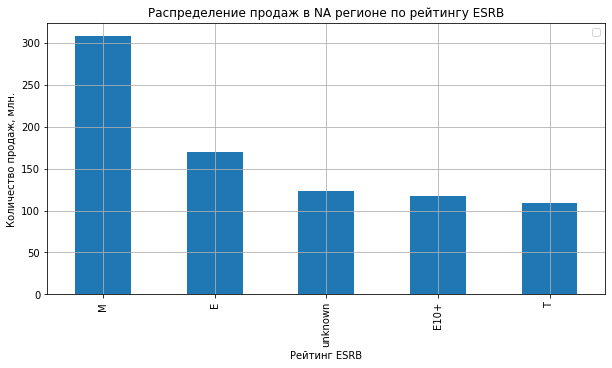

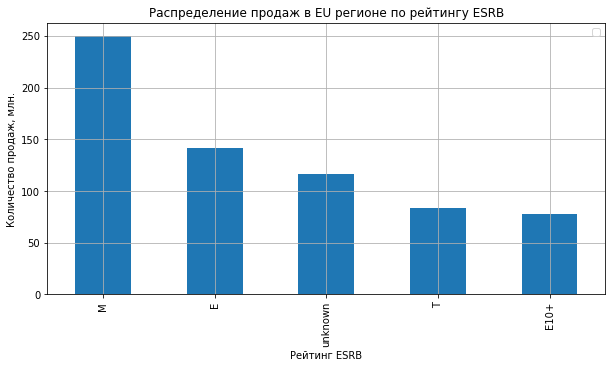

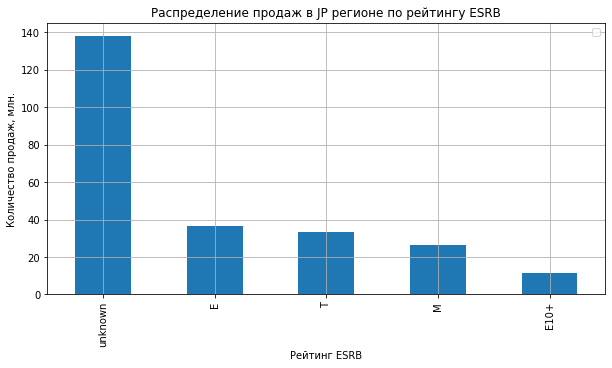

In [24]:
esrb_na = data.query('year_of_release > 2010').pivot_table(index='rating', values='na_sales',
                                                          aggfunc='sum').sort_values(by='na_sales', ascending=False)
esrb_eu = data.query('year_of_release > 2010').pivot_table(index='rating', values='eu_sales',
                                                          aggfunc='sum').sort_values(by='eu_sales', ascending=False)
esrb_jp = data.query('year_of_release > 2010').pivot_table(index='rating', values='jp_sales',
                                                          aggfunc='sum').sort_values(by='jp_sales', ascending=False)

esrb_na.plot(kind='bar', figsize=(10,5), grid=True, title='Распределение продаж в NA регионе по рейтингу ESRB')
plt.legend([])
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество продаж, млн.')
plt.show()

esrb_eu.plot(kind='bar', figsize=(10,5), grid=True, title='Распределение продаж в EU регионе по рейтингу ESRB')
plt.legend([])
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество продаж, млн.')
plt.show()

esrb_jp.plot(kind='bar', figsize=(10,5), grid=True, title='Распределение продаж в JP регионе по рейтингу ESRB')
plt.legend([])
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество продаж, млн.')
plt.show()

В регионах NA и EU лидируют с большим отрывом игры с рейтингом M, т.е. игры для взрослых, далее идут игры категории E и игры, которые не имеют рейтинг ESRB. В регионе JP с большим отрывом идут игры, у которых нет рейтинга ESRB. Примерно одинаково продаются игры с рейтингом E (для всех) и T (подросткам). Игры с рейтингом M (для взрослых) и E10+ (для всех старше 10 лет) пользуются меньшим спросом.

**Итог.**
На основе проделанных работ на данном этапе мы составили портрет пользователя каждого из рассмотренных регионов:

1. В регионе NA, за последние 6 лет, самыми продаваемыми являются игры на платформах X360, PS3, PS4. При этом, самыми прибыльными являются жанры Shooter, Platform, Sports. Игры с рейтингом "для взрослых", "для всех" являются наиболее популярными;
2. В регионе EU, за последние 6 лет, самыми продаваемыми являются игры на платформах PS3, PS4, X360. При этом, самыми прибыльными являются жанры Shooter, Platform, Racing. Игры с рейтингом "для взрослых", "для всех" являются наиболее популярными;
3. В регионе JP, за последние 6 лет, самыми продаваемыми являются игры на платформах 3DS, PS3, PSP. При этом, самыми прибыльными являются жанры Role-Playing, Fighting, Adventure. Игры без рейтинга ESRB являются в этом регионе самыми популярными. Затем идут игры с рейтингом "для всех" и "подросткам".

## Проверка гипотез

Рассмотрим несколько гипотез. Проверим первую из них: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Сформируем нулевую H0 и альтернативную H1 гипотезы.

H0: Средний пользовательский рейтинг (user_score) платформы Xbox One = среднему пользовательскому рейтингу платформы PC<br>
H1: Средний пользовательский рейтинг (user_score) платформы Xbox One ≠ среднему пользовательскому рейтингу платформы PC

Пороговое значение alpha возьмем равное 0.05, т.е. alpha=0.05

Гипотеза H0 формировалась исходя из того, что нам нужно проверить, т.е. средние пользовательские рейтинги платформ Xbox One и PC одинаковые (или равны). Гипотеза H1 формировалась исходя из того, что если гипотеза H0 не примется, то примется противоположная по значению гипотеза H1, т.е. средние пользовательские рейтинги платформ Xbox One и PC неодинаковые (или не равны)

Перед проверкой гипотез удалим пропуски из столбцов critic_score и user_score

In [25]:
data = data.dropna(subset=['critic_score'])
data = data.dropna(subset=['user_score'])

In [26]:
xone = data[data['platform'] == 'XOne']['user_score']
pc = data[data['platform'] == 'PC']['user_score']
results = st.ttest_ind(xone, pc, equal_var = False)
alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

3.2163349594253906e-05
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, а именно то, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверим вторую гипотезу: средние пользовательские рейтинги жанров Action и Sports разные. Сформируем нулевую H0 и альтернативную H1 гипотезы.

H0: Средний пользовательский рейтинг (user_score) жанра Action = срeденему пользовательскому рейтингу жанра Sports<br>
H1: Средний пользовательский рейтинг (user_score) жанра Action ≠ срeденему пользовательскому рейтингу жанра Sports 

Пороговое значение alpha возьмем равное 0.05, т.е. alpha=0.05

In [27]:
action = data[data['genre'] == 'Action']['user_score']
sports = data[data['genre'] == 'Sports']['user_score']
results = st.ttest_ind(action, sports, equal_var = False)
alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.9912393241473461
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, а именно то, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Итог.**
На этапе проверки гипотез можно сделать 2 вывода:
1. Отвергли гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Не смогли отвергнуть гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

## Вывод

По историческим данным о продаже игр было произведено исследование о выявлении закономерностей, опреляющих успешность игры  для потенциально популярного продукта в ближайшем будущем. Мы выяснили следующее:

1. Самыми популярными, за последние годы, являются "молодые" платформы PS4 (около 70 млн продаж за 2016 год) и XOne(около 30 млн продаж за 2016 год). У этих платформ не предвидется сильного спада продаж продукции. Также популярной платформой для игр остается 3DS (около 20 млн продаж за 2016 год). Эту платформу уже можно считать "ветераном", но за последние годы спад популряности не был резкий.
2. На примере платформы PS4 и XOne рассмотрели влияние оценок пользователей и критиков на объемы продаж. Если оценки первых практически никак не влияют на продажи, то к оценкам вторых покупатели прислушиваются.
3. Самым многообразным жанром игр является Action (выпущено чуть более 300 млн. игр за последние 3 года). Самыми прибыльными жанрами можно считать  Shooter (медианное значение продаж больше 0.8 млн), Sports (медианное значение продаж чуть больше 0.3 млн) и Role-Playing (медианное значение продаж равно 0.2 млн).
4. В регионе NA самыми популярными платформами являются X360, PS3, PS4, XOne, 3DS. В данном регионе пользуются спросом жанры Shooter, Platform, Sports. В регионе EU  самыми популярными платформами являются PS3, PS4, X360, а популярными жанрами являются Shooter, Platform, Racing. В регионе JP список самых популярных платформ выглядит следующим образом: 3DS, PS3, PSP, PSV, PS4, а популряными жанрами являются Role-Playing, Fighting, Adventure.

При выборе потенциально популряного продукта можно опираться на такие развивающиеся платформы, как PS4 и XOne. Данные платформы только появились на рынке. Они находятся в топ 5 популярных платформ рассмотренных регионов. Также можно рассматривать платформу 3DS, игры на которой могут стать достаточно популярными. Эта платформа стабильна на протяжении 6-ти лет. Также стоит делать ставку на игры из жанров Role-Playing, Shooter, Platform и Sports.